<a href="https://colab.research.google.com/github/Swap1984/swapnil/blob/main/Assignment_Support_Vector_Machine_(SVM)_Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# 1. Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 2. Loading the Dataset

df = pd.read_csv('/content/data.csv')


In [10]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
# 3. Summarizing the Dataset
print(df.head())  # Displaying the first 5 rows of the dataset
print(df.describe())  # Summary statistics of the dataset

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [ ]:
# 4. Pre-Processing the Dataset
# The dataset is already clean, no NaN values or missing data to handle.
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


The data set is already clean, only last feature has NaN values which can be droped

In [13]:
#df=df.drop('Unnamed:32',axis=1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [15]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
# encoding the Target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])


<ipython-input-19-d75eb2841a2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])


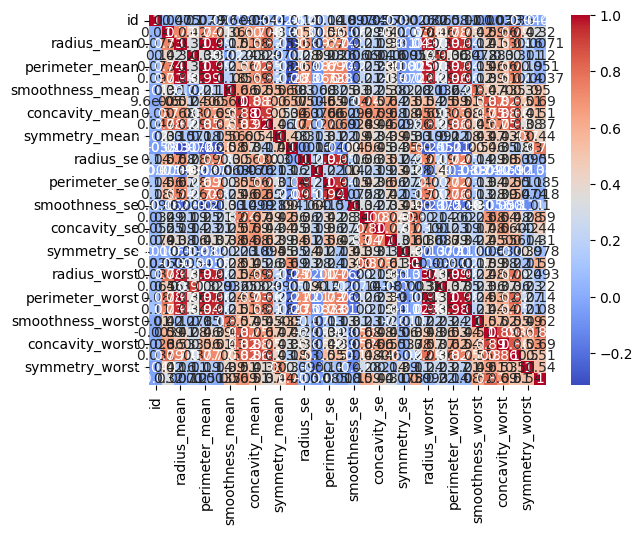

In [26]:
# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [20]:
# 5. Segregating the Dataset into Input (X) and Output (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [21]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [22]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [23]:
# Checking Class Distribution (Imbalanced Dataset)
print(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [27]:
# 6. Performing Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_scaled

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [29]:
# 7. Splitting the Dataset into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 31), (114, 31), (455,), (114,))

To define the best kernel using GridsearchCV

In [54]:
#8. Loading the model
# Define kernels and hyperparameters to test
from sklearn.model_selection import GridSearchCV
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = {
    'kernel': kernel_options,
    'C': [0.1, 1, 10],               # Regularization parameter
    'gamma': ['scale', 'auto']        # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}


In [55]:
# Set up GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')  # scoring can be 'f1_macro', 'roc_auc', etc.
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [56]:
# Get the best parameters and model performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [57]:
# Display the best parameters and score for each kernel
print("Best Parameters:", best_params)
print("Best Cross-Validated Score:", best_score)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validated Score: 0.9736263736263737


In [58]:
# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_pred, average='macro')

In [59]:
# 10. Predicting the Result using the Trained Model
y_pred = model.predict(X_test)

In [60]:
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1_score)

Test Accuracy: 0.9824561403508771
Test F1 Score: 0.9811507936507937


In [61]:
# 12. Predicting the Output of Single Sample using the Trained Model
# Let's use the first sample from the test data as an example
sample = X_test[0].reshape(1, -1)
predicted_class = model.predict(sample)
print(f"Predicted class for the sample: {predicted_class[0]}")
print(f"Actual class for the sample: {y_test.values[0]}")

Predicted class for the sample: 0
Actual class for the sample: 0


# trying with RBF kernel

In [45]:
# 8. Loading the Model (SVM in this case)
model = SVC(kernel='rbf', random_state=40)

In [46]:
# 9. Training the Model
model.fit(X_train, y_train)

SVC(random_state=40)

In [47]:
# 10. Predicting the Result using the Trained Model
y_pred = model.predict(X_test)

In [48]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [49]:
# 11. Calculating the Accuracy of the Trained Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy * 100:.2f}%")

Accuracy of the SVM model: 98.25%


In [53]:
# 12. Predicting the Output of Single Sample using the Trained Model
# Let's use the first sample from the test data as an example
sample = X_test[0].reshape(1, -1)
predicted_class = model.predict(sample)
print(f"Predicted class for the sample: {predicted_class[0]}")
print(f"Actual class for the sample: {y_test.values[0]}")

Predicted class for the sample: 0
Actual class for the sample: 0
